In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv("GIH_Train.csv") #parse_dates=["InvoiceDate"])
test_df = pd.read_csv("GIH_Test.csv") #parse_dates=["InvoiceDate"])

In [3]:
train_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35


In [4]:
test_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35
...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,2011-06-09 09:44:00,15214.0,35
122045,8694,3069,217,16,2011-06-28 15:47:00,16200.0,35
122046,915,1419,3474,6,2010-12-13 12:26:00,15555.0,35
122047,8156,1631,1434,1,2011-06-16 12:45:00,15907.0,35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E400701B88>,
      dtype=object)

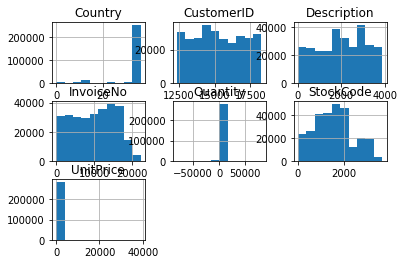

In [5]:
train_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E401D1DDC8>,
      dtype=object)

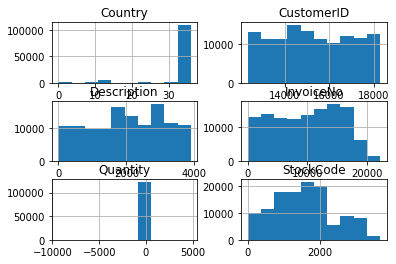

In [6]:
test_df.hist()

In [7]:
train_df.drop_duplicates(keep=False, inplace=True)

In [8]:
train_df['Quantity'] = train_df['Quantity'].abs()
test_df['Quantity'] = test_df['Quantity'].abs()

In [9]:
train_df.loc[train_df['Quantity']>9500,'Quantity']

26477     12540
141379    74215
180978    80995
210734    80995
271013    74215
Name: Quantity, dtype: int64

In [10]:
train_df.dtypes

InvoiceNo        int64
StockCode        int64
Description      int64
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country          int64
dtype: object

In [11]:
#Using string operations, extracting out the Seperate features such as Month, Year, Day, Hour, Minute.
#By experimenting with features, realized that adding the only feature 'Year', improved the model.

#train_df['Date']=train_df['InvoiceDate'].str.split(' ').str[0]
#data['Time']=data['InvoiceDate'].str.split(' ').str[1]

#train_df['Year']=train_df['Date'].str.split('-').str[0]
#data['Month']=data['Date'].str.split('-').str[1]
# data['Day']=data['Date'].str.split('-').str[2]

#data['Hour']=data['Time'].str.split(':').str[0]
# data['Minute']=data['Time'].str.split(':').str[1]

#train_df=train_df.drop(['Date'],axis=1)
#data=data.drop(['Time'],axis=1)
#train_df=train_df.drop(['InvoiceDate'],axis=1)

In [12]:
#train_df['Year']=train_df['Year'].astype(str)
#data['Month']=data['Month'].astype(str)
# data['Day']=data['Day'].astype(str)
#data['Hour']=data['Hour'].astype(str)
# data['Minute']=data['Minute'].astype(str)

In [13]:
#Using string operations, extracting out the Seperate features such as Month, Year, Day, Hour, Minute.
#By experimenting with features, realized that adding the only feature 'Year', improved the model.

#test_df['Date']=test_df['InvoiceDate'].str.split(' ').str[0]
#data['Time']=data['InvoiceDate'].str.split(' ').str[1]

#test_df['Year']=test_df['Date'].str.split('-').str[0]
#data['Month']=data['Date'].str.split('-').str[1]
# data['Day']=data['Date'].str.split('-').str[2]

#data['Hour']=data['Time'].str.split(':').str[0]
# data['Minute']=data['Time'].str.split(':').str[1]

#test_df=test_df.drop(['Date'],axis=1)
#data=data.drop(['Time'],axis=1)
#test_df=test_df.drop(['InvoiceDate'],axis=1)

In [14]:
#test_df['Year']=test_df['Year'].astype(str)
#data['Month']=data['Month'].astype(str)
# data['Day']=data['Day'].astype(str)
#data['Hour']=data['Hour'].astype(str)
# data['Minute']=data['Minute'].astype(str)

In [15]:
train_df = train_df.drop(['InvoiceDate'], axis=1)
test_df = test_df.drop(['InvoiceDate'], axis=1)

In [16]:
train_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056.0,35
1,6349,1300,3682,6,1.95,13098.0,35
2,16783,2178,1939,4,5.95,15044.0,35
4,6080,1210,2886,12,1.65,13952.0,35
5,17388,495,3247,5,1.65,15351.0,35
...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,1.65,17965.0,35
284776,13982,2184,2947,16,0.65,16793.0,35
284777,6641,667,3632,4,8.50,14755.0,35
284778,13820,1576,3089,48,3.45,14866.0,35


In [17]:
train_df.corr().sort_values("UnitPrice", axis = 0, ascending = False)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
UnitPrice,0.008063,0.020199,-0.000409,-0.001017,1.000000,-0.004905,-0.005318
StockCode,0.086606,1.000000,-0.013269,0.002128,0.020199,0.003776,0.006420
InvoiceNo,1.000000,0.086606,0.024130,0.002281,0.008063,-0.007251,0.005122
Description,0.024130,-0.013269,1.000000,0.000797,-0.000409,-0.004957,-0.014520
Quantity,0.002281,0.002128,0.000797,1.000000,-0.001017,-0.004623,-0.006665
CustomerID,-0.007251,0.003776,-0.004957,-0.004623,-0.004905,1.000000,0.389762
Country,0.005122,0.006420,-0.014520,-0.006665,-0.005318,0.389762,1.000000


In [18]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,279687.0,9943.772124,5543.587546,0.0,5071.00,10280.00,14631.00,22188.0
StockCode,279687.0,1574.021310,844.001204,0.0,942.00,1522.00,2106.00,3683.0
Description,279687.0,2024.470651,1090.126777,0.0,1141.00,1987.00,2945.00,3895.0
Quantity,279687.0,13.831090,297.684036,1.0,2.00,6.00,12.00,80995.0
UnitPrice,279687.0,3.469659,79.109387,0.0,1.25,1.95,3.75,38970.0
CustomerID,279687.0,15279.072359,1714.933703,12346.0,13928.00,15142.00,16788.00,18287.0
Country,279687.0,32.788925,6.791948,0.0,35.00,35.00,35.00,36.0


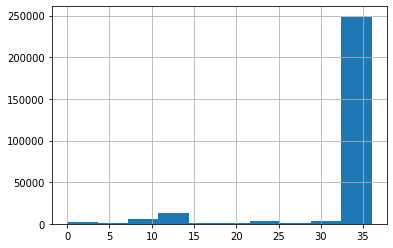

In [19]:
train_df['Country'].hist()

In [20]:
rslt_df = train_df.loc[train_df['Country'] < 35] 
rslt_df.shape

(31288, 7)

In [21]:
rslt_df = pd.DataFrame(np.repeat(rslt_df.values,1,axis=0))
rslt_df.shape

(31288, 7)

In [22]:
rslt_df.columns = train_df.columns

In [23]:
rslt_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,3140.0,1508.0,3495.0,30.0,1.65,14646.0,23.0
1,262.0,787.0,2601.0,24.0,0.42,12686.0,13.0
2,20652.0,3131.0,1576.0,36.0,1.06,12431.0,0.0
3,3769.0,3677.0,634.0,1.0,50.00,14156.0,10.0
4,2008.0,1416.0,2585.0,96.0,1.45,14646.0,23.0
...,...,...,...,...,...,...,...
31283,375.0,1369.0,2009.0,4.0,4.95,12647.0,14.0
31284,16777.0,829.0,2742.0,6.0,2.95,12523.0,13.0
31285,9792.0,3137.0,3103.0,60.0,1.45,12763.0,19.0
31286,6022.0,937.0,3393.0,12.0,0.42,14911.0,10.0


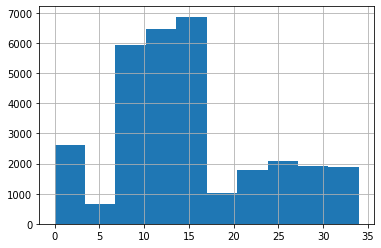

In [24]:
rslt_df['Country'].hist()

In [25]:
train = train_df.append(rslt_df)

In [26]:
train_df.shape

(279687, 7)

In [27]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056.0,35
1,6349,1300,3682,6,1.95,13098.0,35
2,16783,2178,1939,4,5.95,15044.0,35
4,6080,1210,2886,12,1.65,13952.0,35
5,17388,495,3247,5,1.65,15351.0,35


In [28]:
train_df['InvoiceNo']=train_df['InvoiceNo'].astype(str)
train_df['StockCode']=train_df['StockCode'].astype(str)
train_df['Description']=train_df['Description'].astype(str)
train_df['CustomerID']=train_df['CustomerID'].astype(str)
train_df['Country']=train_df['Country'].astype(str)
train_df['Quantity']=train_df['Quantity'].astype(int)

In [29]:
test_df['InvoiceNo']=test_df['InvoiceNo'].astype(str)
test_df['StockCode']=test_df['StockCode'].astype(str)
test_df['Description']=test_df['Description'].astype(str)
test_df['CustomerID']=test_df['CustomerID'].astype(str)
test_df['Country']=test_df['Country'].astype(str)

In [30]:
Y = train_df['UnitPrice']
X = train_df.drop(['UnitPrice'], axis=1)

In [31]:
X.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country
0,6141,1583,144,3,14056.0,35
1,6349,1300,3682,6,13098.0,35
2,16783,2178,1939,4,15044.0,35
4,6080,1210,2886,12,13952.0,35
5,17388,495,3247,5,15351.0,35


In [32]:
from catboost import CatBoostRegressor
#Evalution Metrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [33]:
reg = {
"CatBoostRegressor":CatBoostRegressor()
}

In [34]:
%%time

model = CatBoostRegressor(depth=4, iterations=756, learning_rate=0.291205,loss_function='RMSE',
                         l2_leaf_reg=2)

model.fit(X, Y)
y_test_pre = model.predict(test_df)
y_train_pre = model.predict(X)

# Print the evalution metrics for model
print("-----Training Data Evalution-----")
print("R2 Value: ", r2_score(Y, y_train_pre))
print("MAE Value: ", mean_absolute_error(Y, y_train_pre))
print("RMSE: ",np.sqrt(mean_squared_error(Y, y_train_pre)))

0:	learn: 77.6526424	total: 74.6ms	remaining: 56.3s
1:	learn: 76.5266766	total: 92.9ms	remaining: 35s
2:	learn: 76.0853750	total: 113ms	remaining: 28.3s
3:	learn: 69.6138679	total: 134ms	remaining: 25.3s
4:	learn: 68.6212021	total: 157ms	remaining: 23.5s
5:	learn: 68.3533074	total: 180ms	remaining: 22.5s
6:	learn: 62.7860217	total: 201ms	remaining: 21.5s
7:	learn: 62.6051247	total: 221ms	remaining: 20.6s
8:	learn: 60.8026347	total: 242ms	remaining: 20.1s
9:	learn: 60.6386804	total: 262ms	remaining: 19.5s
10:	learn: 60.4871521	total: 289ms	remaining: 19.6s
11:	learn: 60.4504220	total: 311ms	remaining: 19.3s
12:	learn: 59.2972089	total: 332ms	remaining: 19s
13:	learn: 59.2941061	total: 356ms	remaining: 18.9s
14:	learn: 59.2716900	total: 377ms	remaining: 18.6s
15:	learn: 58.3244012	total: 395ms	remaining: 18.3s
16:	learn: 58.3014657	total: 415ms	remaining: 18s
17:	learn: 58.1793877	total: 433ms	remaining: 17.7s
18:	learn: 58.1468107	total: 451ms	remaining: 17.5s
19:	learn: 58.1156397	tota

In [35]:
#We can see that the RMSE Score achieved is 14.25!

## Saving The Model

In [36]:
prediction = {'UnitPrice': y_test_pre}

In [37]:
final = pd.DataFrame(prediction)
final

,UnitPrice
0,1.803334
1,3.524824
2,2.388829
3,2.905227
4,8.386456
...,...
122044,1.551571
122045,1.278738
122046,1.243475
122047,6.789401


In [38]:
# saving the final output informateion to the .CSV file 
#final.to_csv("Submission.csv", index=False)

In [39]:
dff = pd.read_csv('test_df_label.csv')
test = dff[['UnitPrice']]
test

,UnitPrice
0,1.65
1,1.25
2,3.75
3,1.65
4,12.75
...,...
122044,0.38
122045,1.69
122046,1.25
122047,3.95


In [40]:
from sklearn.metrics import mean_squared_error
rmse_RFR = np.sqrt(mean_squared_error(test, final))
rmse_RFR

23.584189422069844